## CHX olog link:
https://logbook.nsls2.bnl.gov/11-ID/#41952_1

## Just run this cell for load data analysis packages

In [1]:
from filestore.path_only_handlers import RawHandler 
import nmrglue
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
#%reset -f  #for clean up things in the memory

from databroker import DataBroker as db, get_images, get_table, get_events, get_fields

def norm_y(y ):
    return (y - y.min()) / (y.max() - y.min())

CYCLE = '2017_1'
username = getpass.getuser()
#username = 'commissioning'
#username = "colosqui"   #provide the username to force the results to save in that username folder
data_dir0 = os.path.join('/XF11ID/analysis/', CYCLE, username, 'Results/')
##Or define data_dir here, e.g.,#data_dir = '/XF11ID/analysis/2016_2/rheadric/test/'
os.makedirs(data_dir0, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % data_dir0)

data_dir = data_dir0

detector = 'xray_eye3_image'
#get_fields( db[uid] )

/opt/conda_envs/analysis/lib/python3.5/site-packages/filestore/retrieve.py:15: UserWarning: Do not import filestore.retrieve, import filestore.api instead
  warnings.warn("Do not import filestore.retrieve, "


Results from this analysis will be stashed in the directory /XF11ID/analysis/2017_1/yuzhang/Results/


## change uid here to reterive data

In [2]:

uid_slit = 'c95324' #count : 1 ['c95324'] (scan num: 11587) (Measurement: 0.250 mm V MBS, bare lattice coupling 2 nm H 8.8 pm V )
uid_scan = '929cc4'  #dscan : s4_yc -0.200 0.200 401 ['929cc4'] (scan num: 11589)



#a new cycle
uid_slit = 'd246fc' #count : 1 ['d246fc'] (scan num: 11600) (Measurement: B Fiber after scans, bare lattice coupling 2 nm H 8.5 pm V )
uid_slit = '343c67' #count : 1 ['343c67'] (scan num: 11601) (Measurement: Flat field after scans, bare lattice coupling 2 nm H 8.5 pm V )
uid_slit = '556c40' #count : 1 ['556c40'] (scan num: 11602) (Measurement: Flat field, bare lattice coupling 30 pm V )
uid_slit = '0a4af0'  #count : 1 ['0a4af0'] (scan num: 11603) (Measurement: B fiber, bare lattice coupling 30 pm V )
uid_scan = 'd90223'  #dscan : s4_yc -0.300 0.300 601 ['d90223'] (scan num: 11604)



uid_slit = '31a8fc' #count : 1 ['31a8fc'] (scan num: 11594) (Measurement: B Fiber, bare lattice coupling 2 nm H 8.8 pm V )
#uid_scan = 'babda7' #dscan : s4_yc -0.200 0.200 21 ['babda7'] (scan num: 11595)
uid_scan =  '1af169' #dscan : s4_yc -0.200 0.200 401 ['1af169'] (scan num: 11597)


uid_scan =  'd90223' # dscan : s4_yc -0.300 0.300 601 ['d90223'] (scan num: 11604)



## get data here

In [51]:
get_fields( db[uid_scan] )

{'s4_yc',
 's4_yc_user_setpoint',
 'xray_eye3_image',
 'xray_eye3_stats1_total',
 'xray_eye3_stats2_total',
 'xray_eye3_stats3_total',
 'xray_eye3_stats4_total',
 'xray_eye3_stats5_total'}

In [52]:
imgs_slit = get_images( db[uid_slit], detector  )
imgs_scan = get_images( db[uid_scan], detector  )
data_scan_roi = np.array( get_table( db[uid_scan],  fields = ['xray_eye3_stats1_total'],  )['xray_eye3_stats1_total'] )
data_scan_motor = np.array( get_table( db[uid_scan],  fields = ['s4_yc'],  )['s4_yc'] )


In [55]:
#data_scan_motor.shape

In [4]:
#show_img( np.array(imgs_scan[100]), vmin=.1, vmax= 10, logs=True,
#         image_name= str(uid_scan) + '_img',  save=True, path=data_dir) 

In [5]:
imgs_scan

<Frames>
Length: 601 frames
Frame Shape: 2050 x 2448
Pixel Datatype: uint8

In [6]:
#for i in range (601):
#    print( i, imgs_scan[i].size )

## plot data here

<IPython.core.display.Javascript object>


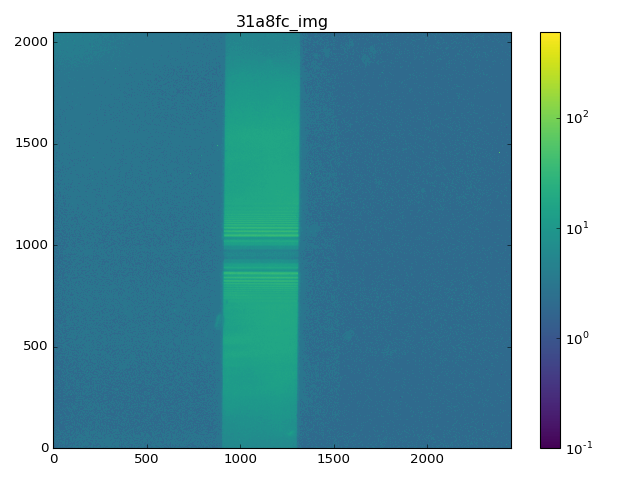

In [7]:
ax = plt.subplots()
show_img( imgs_slit[0], ax=ax, vmin=.1, vmax= 600, logs=True,
         image_name= str(uid_slit) + '_img',  save=True, path=data_dir) 

## do some analysis here

### data from image

In [26]:
data_slit = np.array( imgs_slit[0], dtype = float )
data_slit_cut = np.average(   data_slit[:, 1000:1001],  axis=1)
yi = norm_y( data_slit_cut )
xi = np.arange(len(yslit_norm)) 

### data from scan

In [356]:
ys  = norm_y(  data_scan_roi )
xs = data_scan_motor

## consider the convolution slit 

In [396]:
yvoigt = nmrglue.lineshapes1d.sim_pvoigt_fwhm(x = xs, x0= -0.13, fwhm=2.4*10**(-3),
                                                     eta=0.5)

ys_conv = np.convolve(  yvoigt, ys, 'same')
ysc  = norm_y(  ys_conv )

In [358]:
#plot1D( x= xscan_roi, y = ysc)

In [359]:
#plot1D( yvoigt, xscan_roi)

## match two plot by fit

In [360]:
from lmfit import  Model
from lmfit import Minimizer, minimize, Parameters, Parameter, report_fit

In [361]:
def match_func( y,  paras   ):
    para = paras.valuesdict()     
    ( x_stc, x_base, y_sca, y_base )  = para['x_stc'],para['x_base'], para['y_sca'],para['y_base']  
    yp =  y * y_sca + y_base
    return  yp    


def match_interp_func(x, y, xp, paras   ):
    para = paras.valuesdict()     
    ( x_stc, x_base, y_sca, y_base )  = para['x_stc'],para['x_base'], para['y_sca'],para['y_base']  
    #print( x_stc, x_base, y_sca, y_base )
    #print( x_stc*x + x_base )
    yp = np.interp( xp, x_stc*x + x_base, y) * y_sca + y_base
    return  yp
    
def match_residual(  paras, x, y, xp, yp   ):
    model = match_interp_func(x, y, xp, paras   )
    return  model- yp
    
    

# init paras and plot

In [389]:
paras = Parameters()
paras.add('x_stc',   value= 0.000705,   )
#paras.add('x_base', value= -.8)
paras.add('x_base', value= -.815)
paras.add('y_sca', value= 1, min= 0.1,  max=10)
paras.add('y_base', value= 0, min= -1, max=1)
ym = match_interp_func( xi, yi, xs, paras   )

<IPython.core.display.Javascript object>


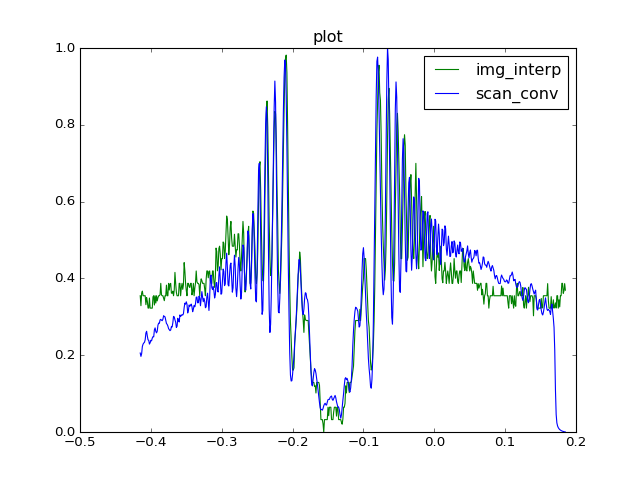

In [390]:
fig, ax = plt.subplots( )
plot1D( x=  xs , y= ym, ax = ax, ls='-', marker='', c='g', legend='img_interp' )
#plot1D( x=  xs , y= ys, ax = ax, ls='-', marker='', c='r', legend='scan' )
plot1D( x=  xs , y= ysc, ax = ax, ls='-', marker='', c='b', legend='scan_conv' )

## Do fit and plot 

In [391]:
result = minimize( match_residual, paras, args=(xi, yi, xs, ysc),  method='leastsq')
ymat = match_interp_func( xi, yi, xs, result.params)

In [392]:
#report_fit( result )

In [393]:
result.values

{'x_base': -0.81233643997723592,
 'x_stc': 0.00070080452120909484,
 'y_base': -0.0056449799068855055,
 'y_sca': 0.97024800088665886}

<IPython.core.display.Javascript object>


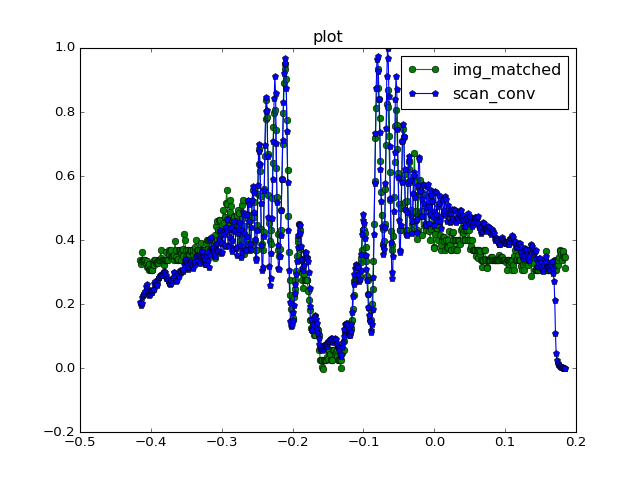

In [394]:
if True:
    fig, ax = plt.subplots( )
    plot1D( x = xs, y = ymat, ax = ax, ls='-', marker='o', c='g', legend='img_matched' )
    #plot1D( x=  xs , y= ys, ax = ax, ls='-', marker='p', c='r', legend='scan' )
    plot1D( x=  xs , y= ysc, ax = ax, ls='-', marker='p', c='b', legend='scan_conv' )

In [261]:
#fig, ax = plt.subplots( )
#plot1D( x=  xi , y= yi, ax = ax, ls='-', marker='', c='b', legend='img' )
#plot1D( x=  xs , y= ys, ax = ax, ls='-', marker='o', c='r', legend='scan' )

<IPython.core.display.Javascript object>


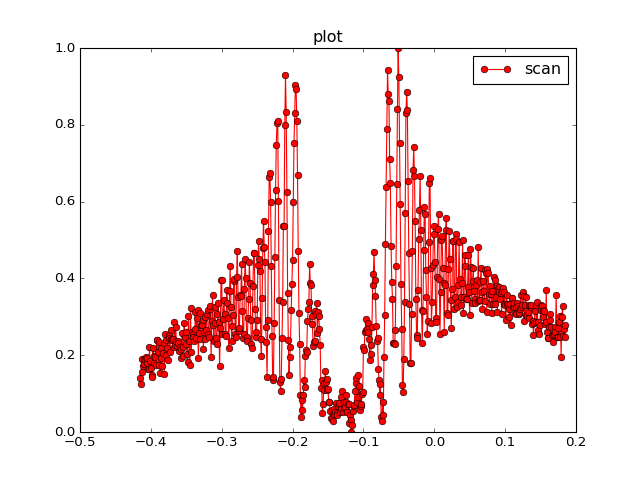

In [311]:
#fig, ax = plt.subplots( )
plot1D( x=  xs , y= ys,  ls='-', marker='o', c='r', legend='scan' )

## save data here

In [395]:
np.savetxt( data_dir + 'slit_%s.txt'%uid_slit, yi   )
np.savetxt( data_dir + 'data_scan_%s.txt'%uid_scan, ys )